In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
PLOTFILE = '/tmp/WholeBrain_Full_TKO.pdf'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/WholeBrain/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

# qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
# qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
# dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/WholeBrain/RealTractDataIncludingTensorsAndScalars.vtk 543022588


In [4]:
runs = {}

In [5]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits,coords_only=False,  binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [6]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, coords_only=False, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


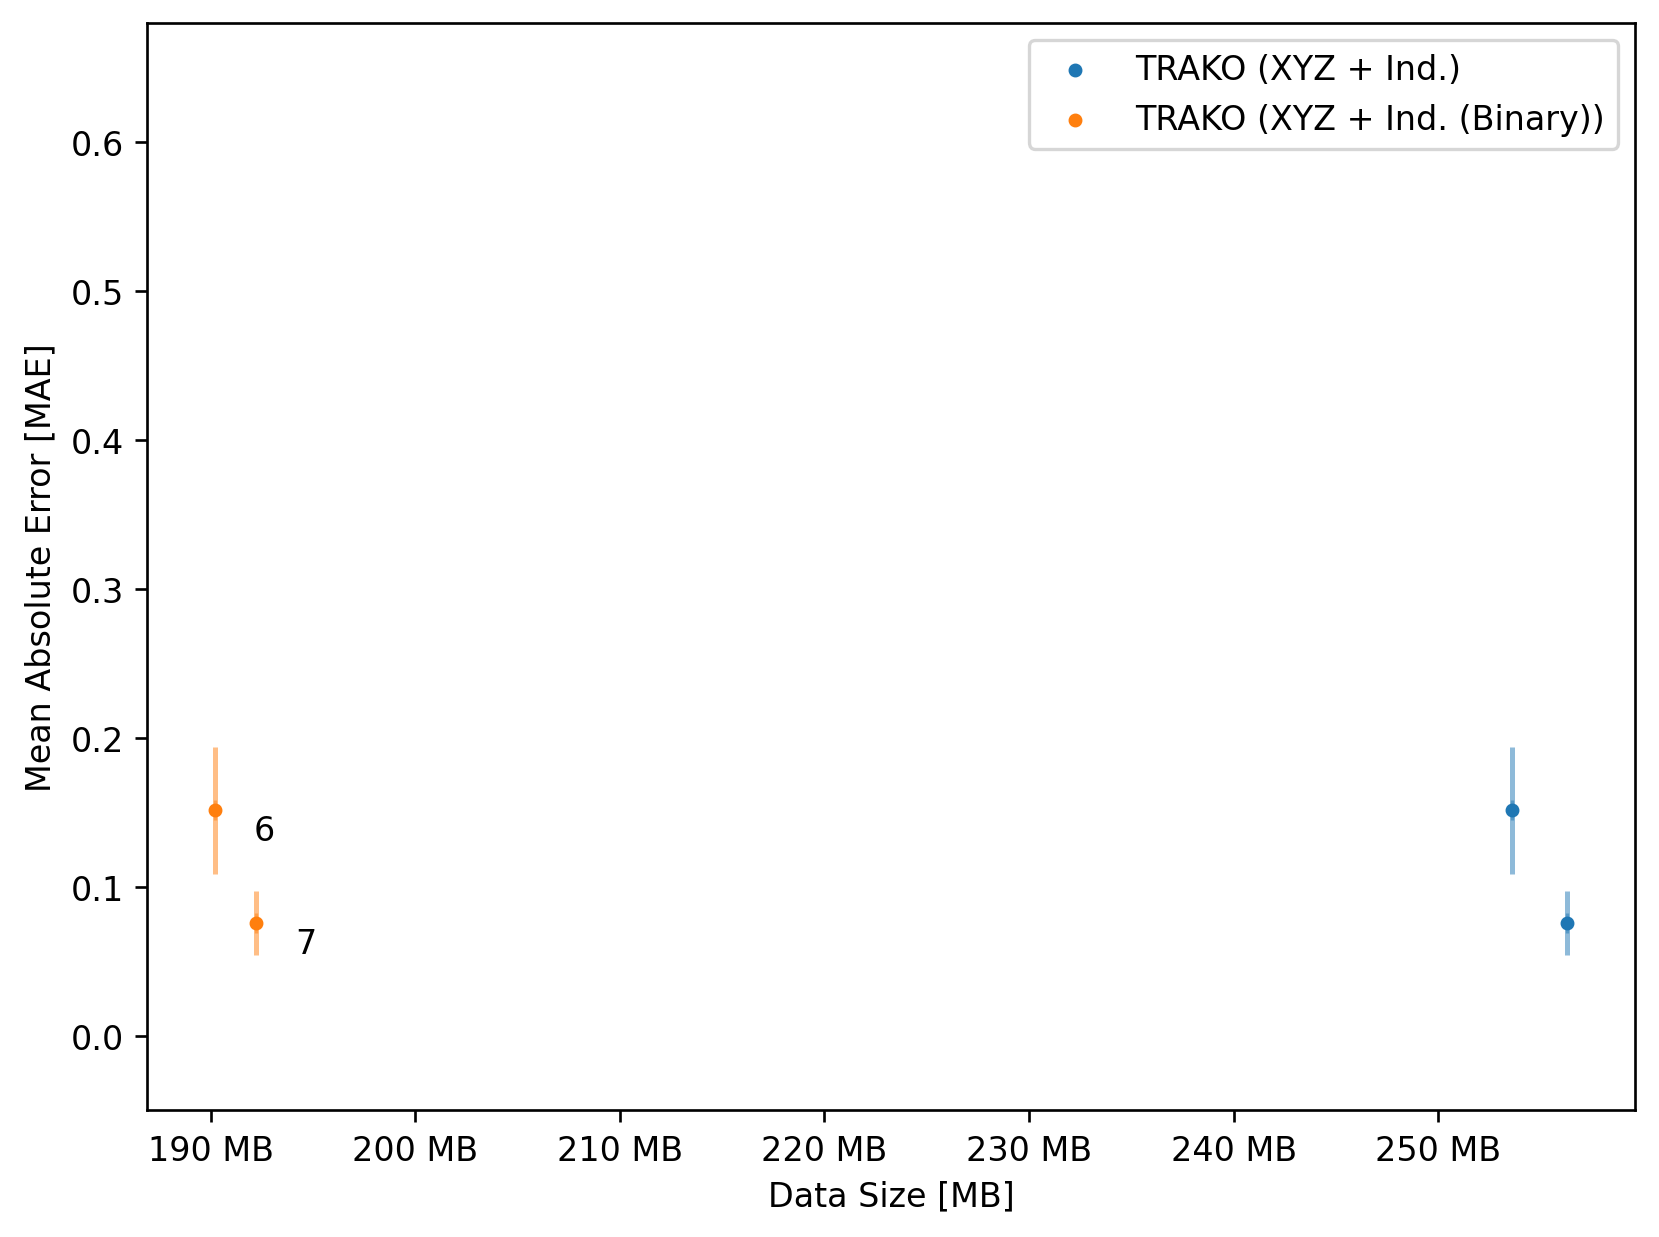

In [7]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename=PLOTFILE)

In [8]:
print(input_size/1000000)

543.022588


In [9]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=1)

--------------------
qbi{bits}
size 256311269.0
ratio 52.79915151522205
c_factor 2.118605982946462
min_e 0.00039436595
max_e 0.13635175
mean_e 0.0757417231798172
std 0.02130272053182125
e_min_e 0.0017766438
e_max_e 0.13531366
e_mean_e 0.07571025937795639
e_std 0.012376302853226662
c_time 19.913995265960693
d_time 28.53705143928528
--------------------
~~~XYZ + Ind. & 256.0 & 52.799$\times$ & 2.119\% & 0.0 & 0.136 & 0.076$\pm$0.021 & 0.002 & 0.135 & 0.076$\pm$0.012 & 19.914 & 28.537\\
--------------------
qbi{bits}_binary
size 192232868.0
ratio 64.59947113654874
c_factor 2.8248165553041638
min_e 0.00039436595
max_e 0.13635175
mean_e 0.0757417231798172
std 0.02130272053182125
e_min_e 0.0017766438
e_max_e 0.13531366
e_mean_e 0.07571025937795639
e_std 0.012376302853226662
c_time 19.444485902786255
d_time 28.501254081726074
--------------------
~~~XYZ + Ind. (Binary) & 192.0 & 64.599$\times$ & 2.825\% & 0.0 & 0.136 & 0.076$\pm$0.021 & 0.002 & 0.135 & 0.076$\pm$0.012 & 19.444 & 28.501\\
